In [4]:
import pandas
import matplotlib.pyplot as pyplot
import seaborn

In [5]:
dataframe = pandas.read_csv("housing_data.csv")

In [6]:
numerical_features = ["SalePrice", "LotArea", "OverallQual",
                      "OverallCond", "YearBuilt", "1stFlrSF",
                      "2ndFlrSF", "BedroomAbvGr"]

categorical_features = ["MSZoning", "LotShape",
                        "Neighborhood", "CentralAir",
                        "SaleCondition", "MoSold", "YrSold"]

<Axes: >

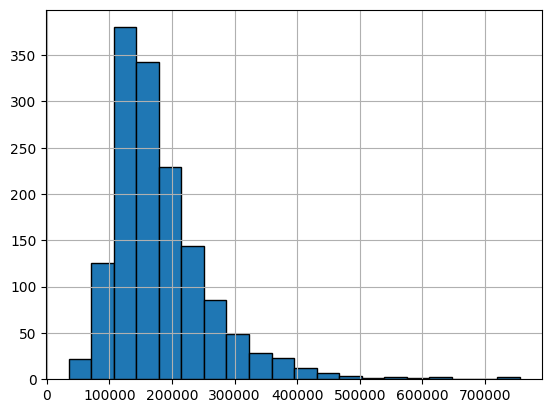

In [7]:
dataframe["SalePrice"].describe()

dataframe["SalePrice"].hist(edgecolor="black",
                            bins=20)

array([[<Axes: title={'center': 'SalePrice'}>,
        <Axes: title={'center': 'LotArea'}>],
       [<Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': '1stFlrSF'}>],
       [<Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>]], dtype=object)

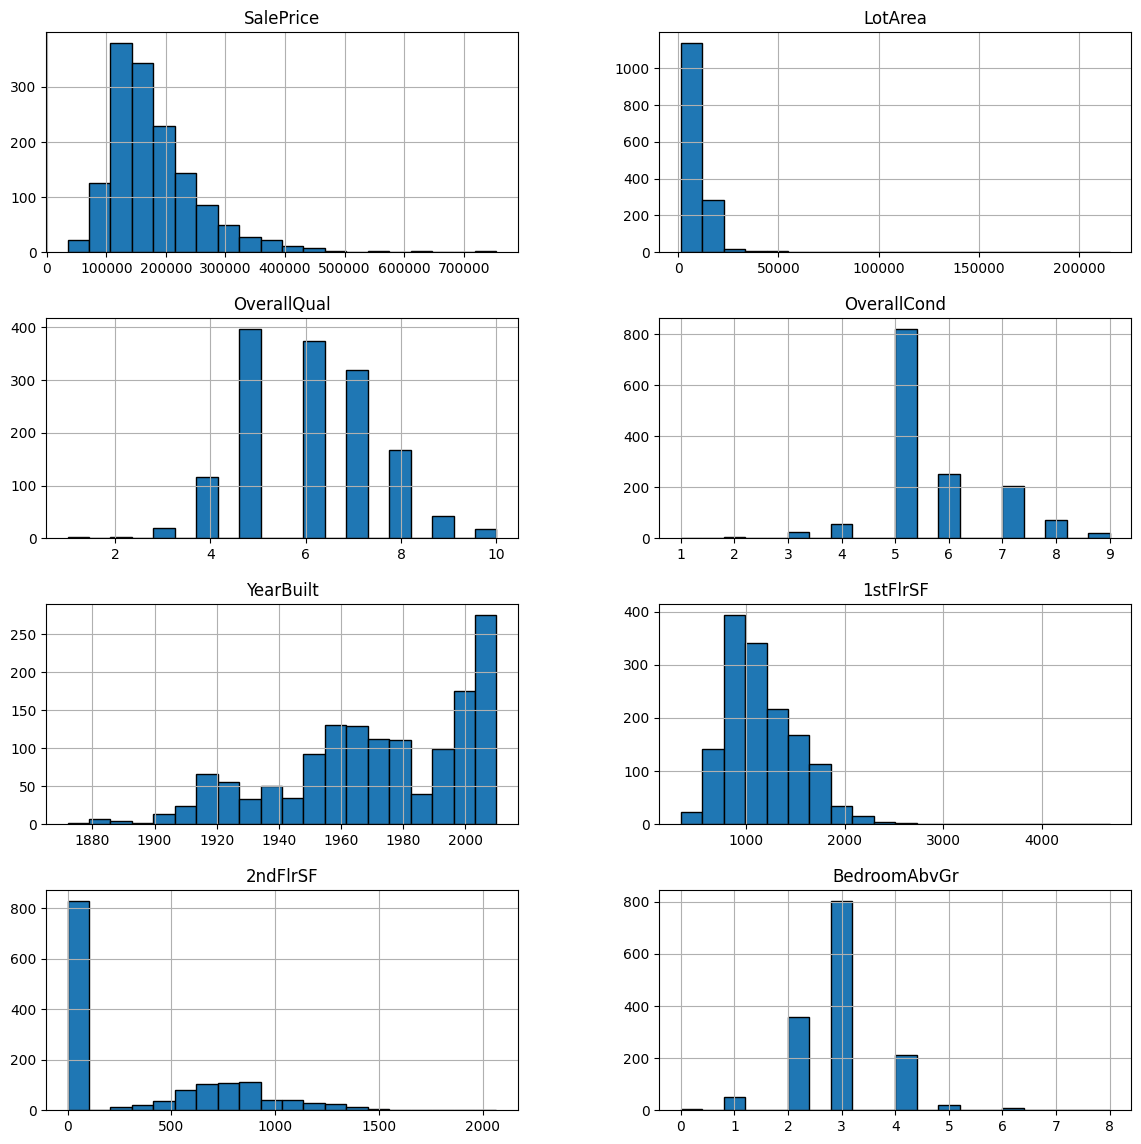

In [8]:
dataframe[numerical_features].describe()

dataframe[numerical_features].hist(edgecolor="black",
                                   bins=20,
                                   figsize=(14, 14),
                                   layout=(4,2))

<Axes: >

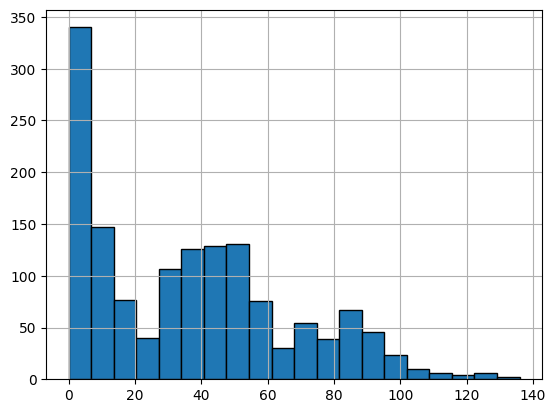

In [9]:
dataframe["AgeWhenSold"] = dataframe["YrSold"] - dataframe["YearBuilt"]

numerical_features.append("AgeWhenSold")

dataframe["AgeWhenSold"].hist(edgecolor="black",
                              bins=20)

<Axes: title={'center': 'MSZoning'}, xlabel='MSZoning'>

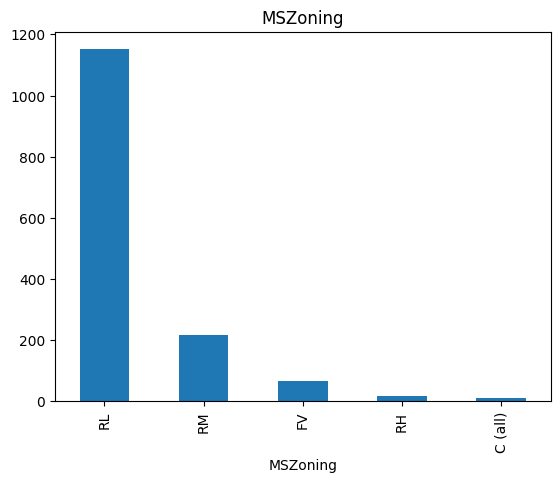

In [10]:
dataframe["MSZoning"].value_counts().plot(kind="bar",
                                          title="MSZoning")

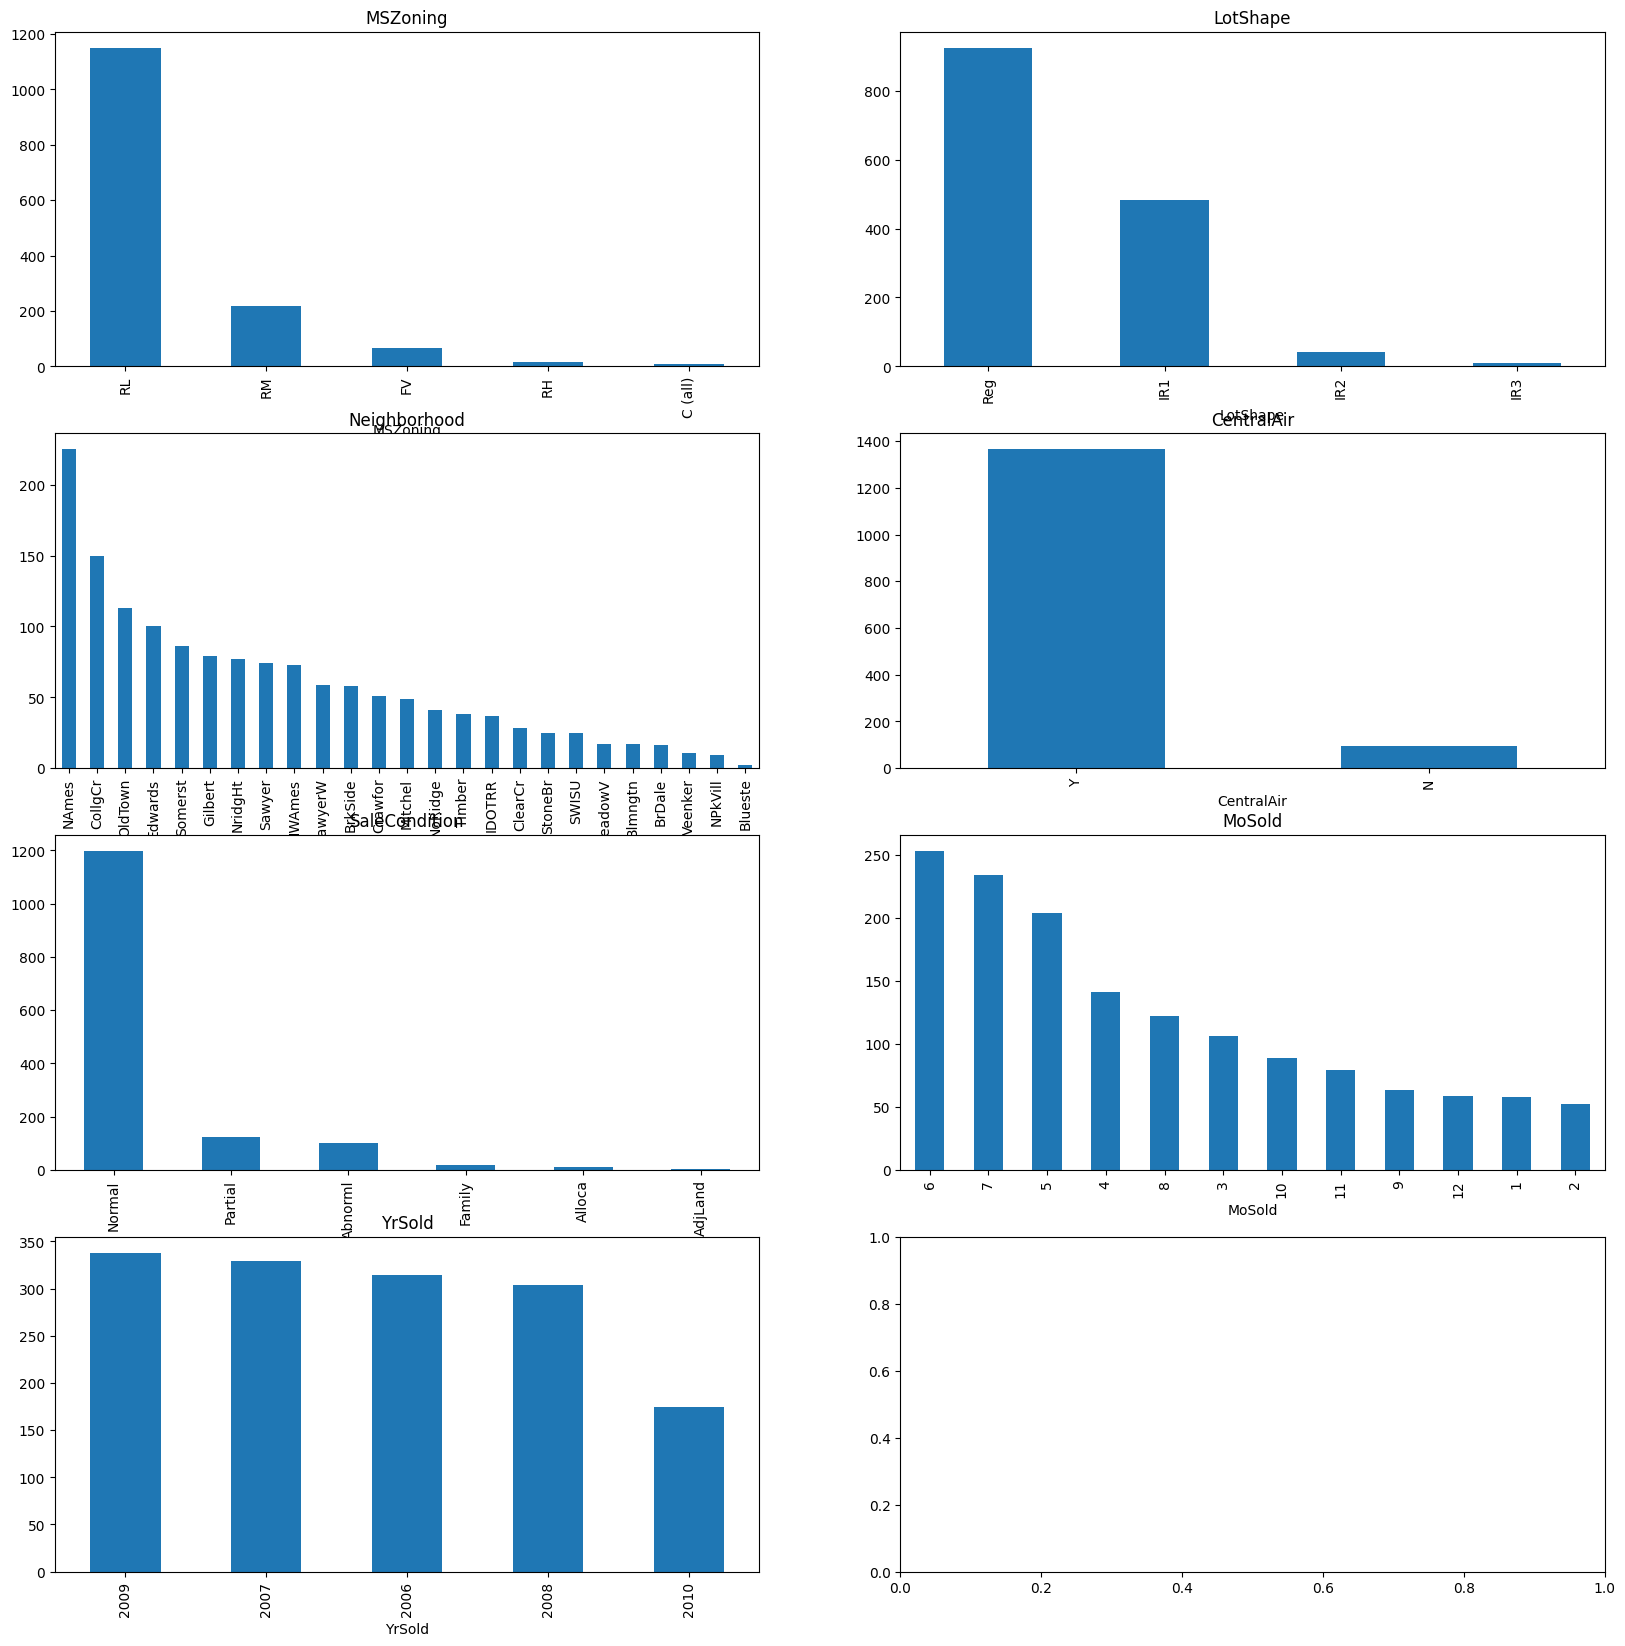

In [11]:
figure, axis = pyplot.subplots(4, 2,
                               figsize=(20, 20))

for feature, subplot in zip(categorical_features, 
                            axis.flatten()):
  
  dataframe[feature].value_counts().plot(kind="bar",
                                         ax=subplot,
                                         title=feature)

In [12]:
def identify_above30(series):

  counts = series.value_counts()

  return list(counts[counts >= 30].index)

In [13]:
categories_to_keep = dataframe[categorical_features].apply(identify_above30,
                                                         axis = 0)

In [14]:
for feature in categorical_features:

  dataframe = dataframe.loc[dataframe[feature].isin(categories_to_keep[feature])]

dataframe.shape

(1246, 82)

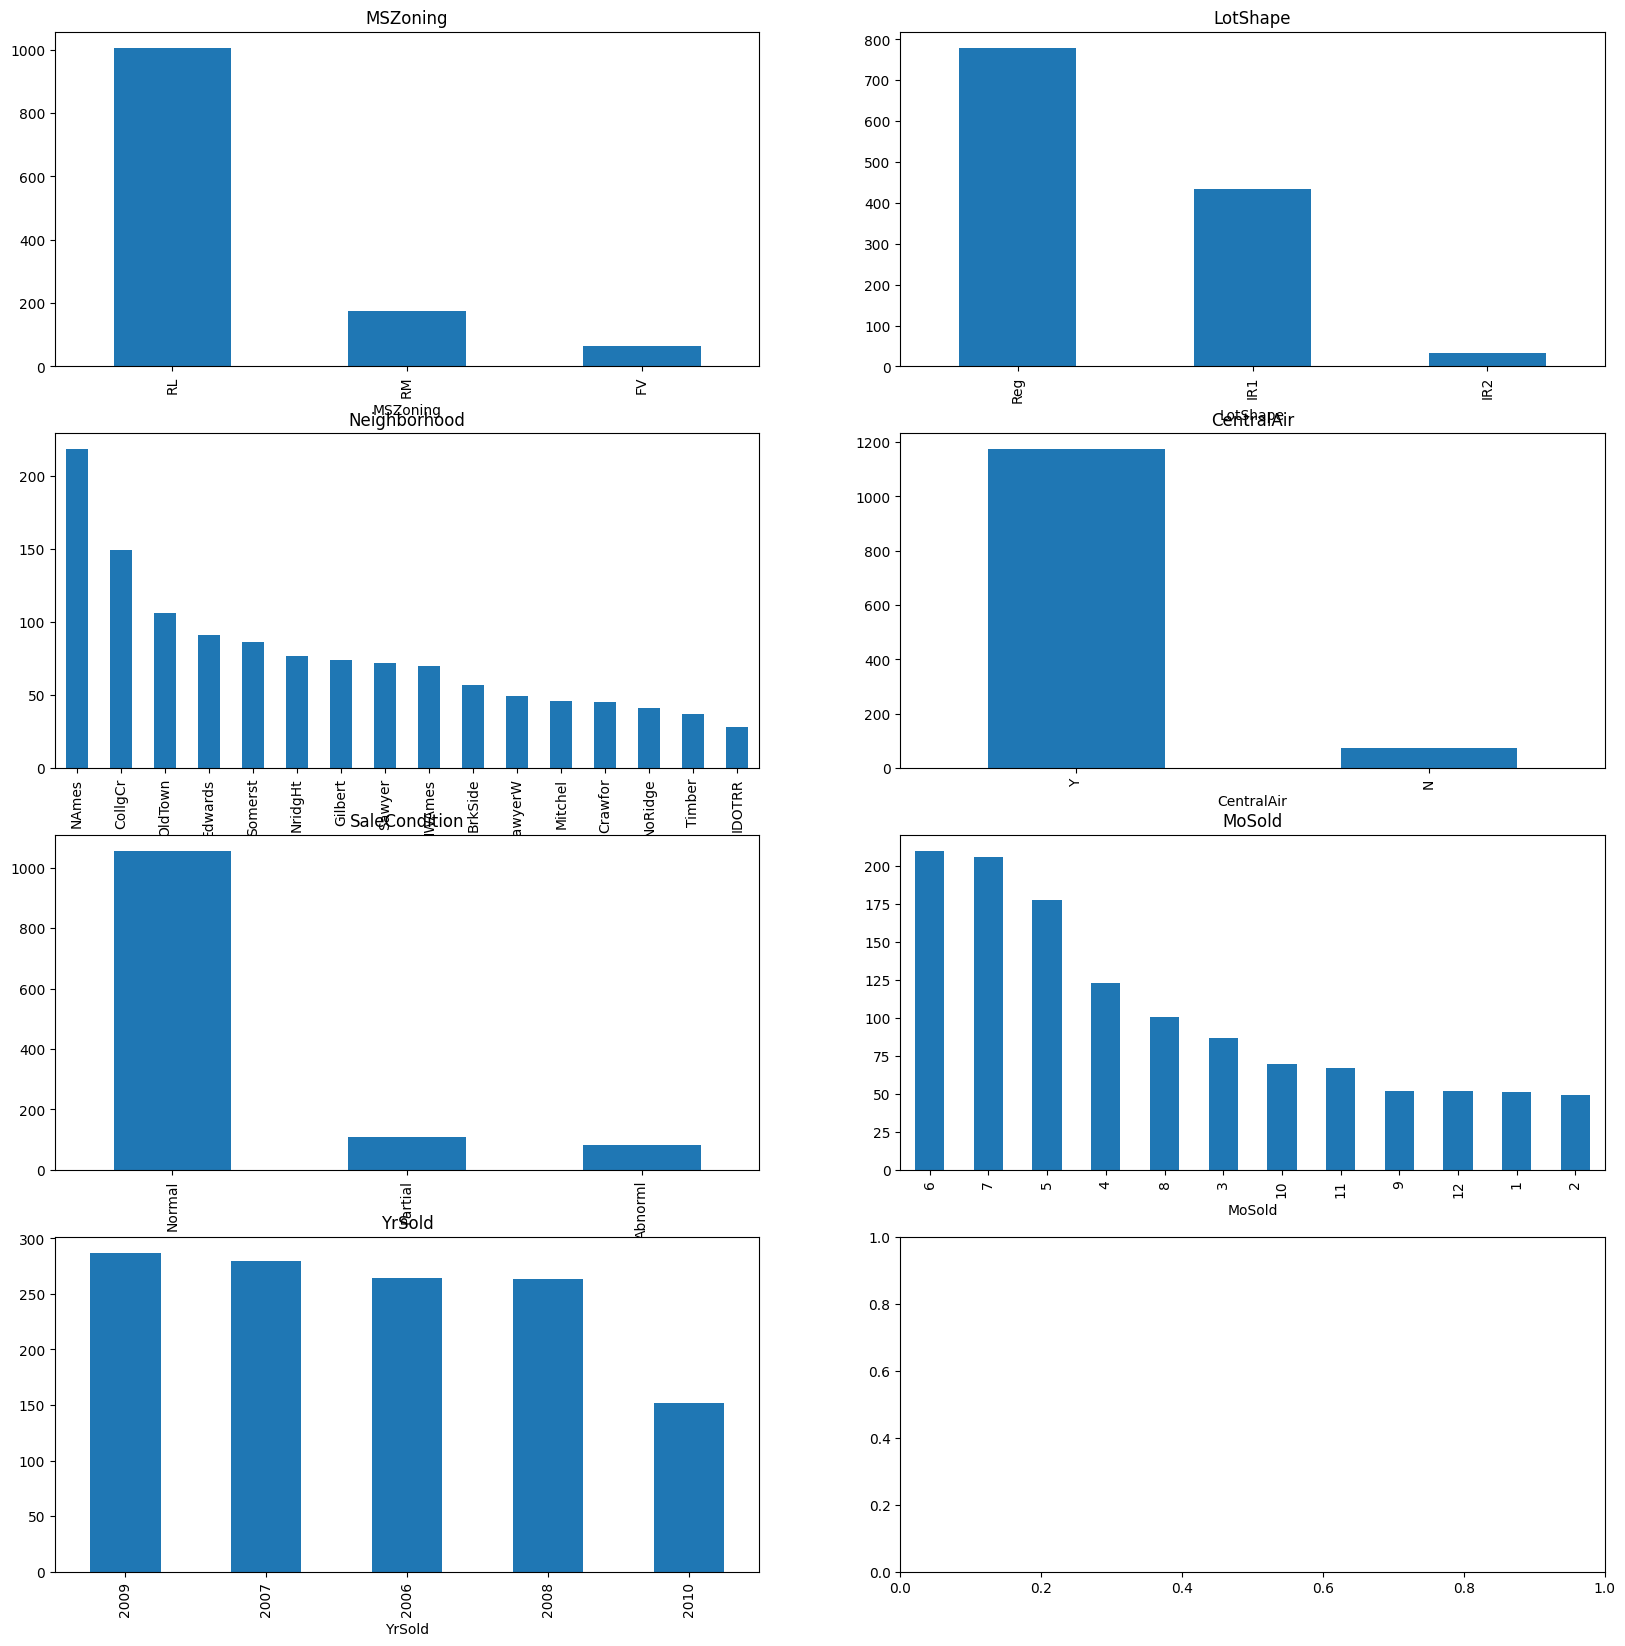

In [15]:
figure, axis = pyplot.subplots(4, 2,
                               figsize=(20, 20))

for feature, subplot in zip(categorical_features, 
                            axis.flatten()):
  
  dataframe[feature].value_counts().plot(kind="bar",
                                         ax=subplot,
                                         title=feature)

<Axes: xlabel='LotArea', ylabel='SalePrice'>

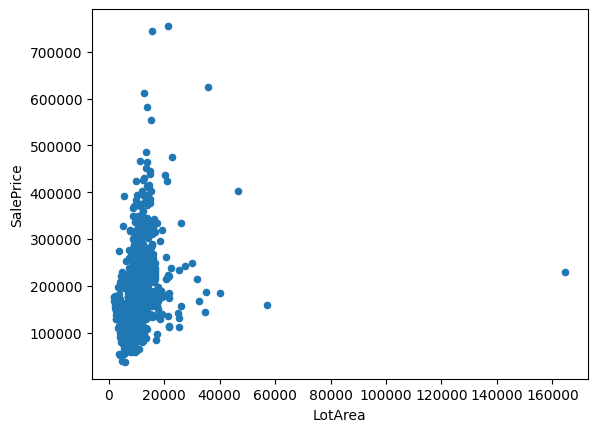

In [16]:
dataframe.plot.scatter(x="LotArea",
                       y="SalePrice")

/home/blaise/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


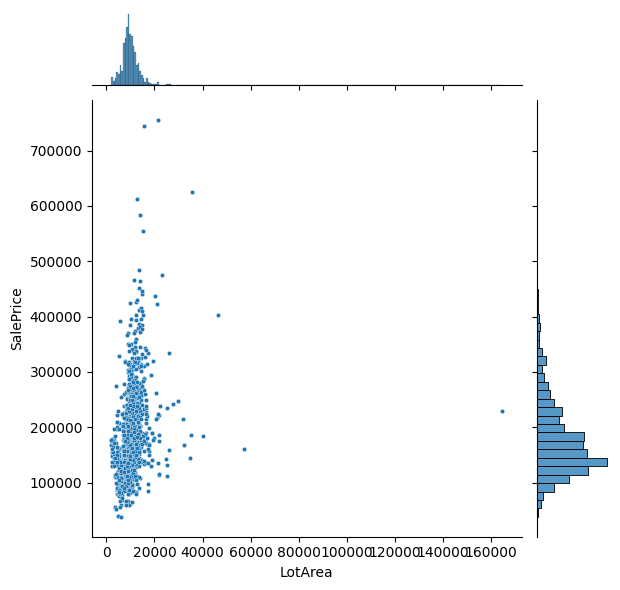

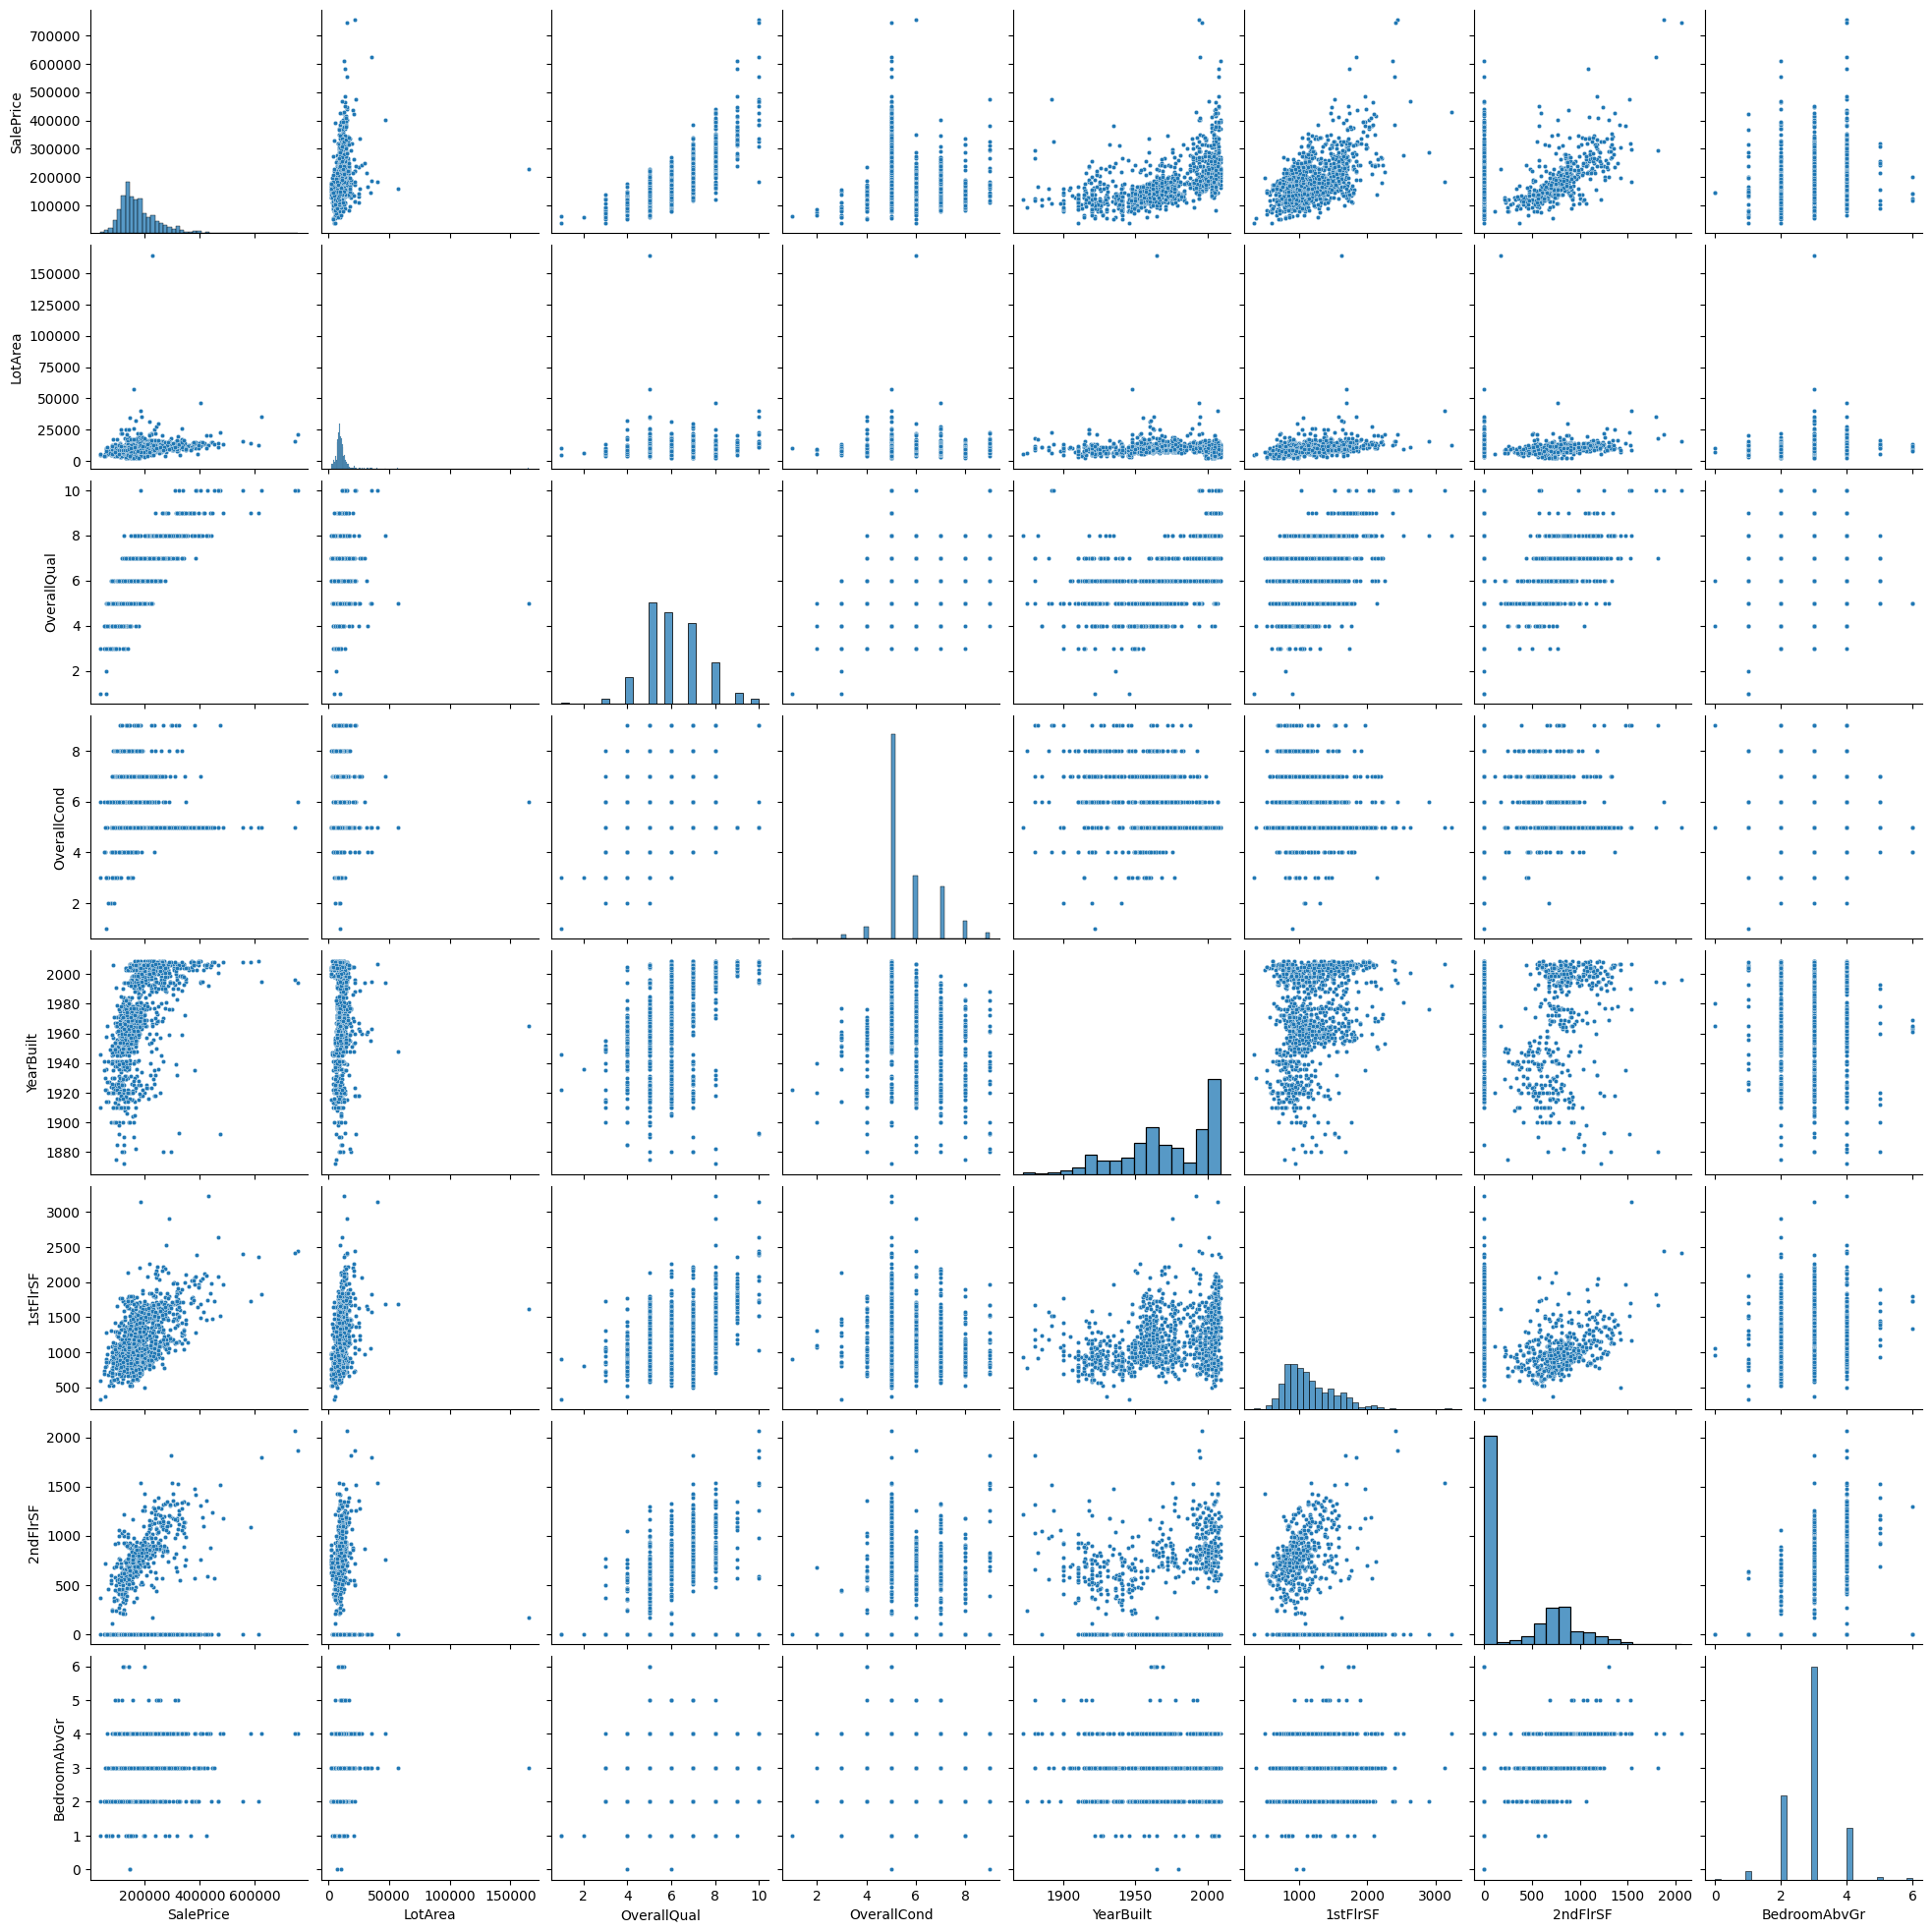

In [17]:
seaborn.jointplot(x="LotArea",
                  y="SalePrice",
                  data=dataframe,
                  joint_kws={"s": 10})

seaborn.pairplot(dataframe[numerical_features[:8]],
                 plot_kws={"s": 10})

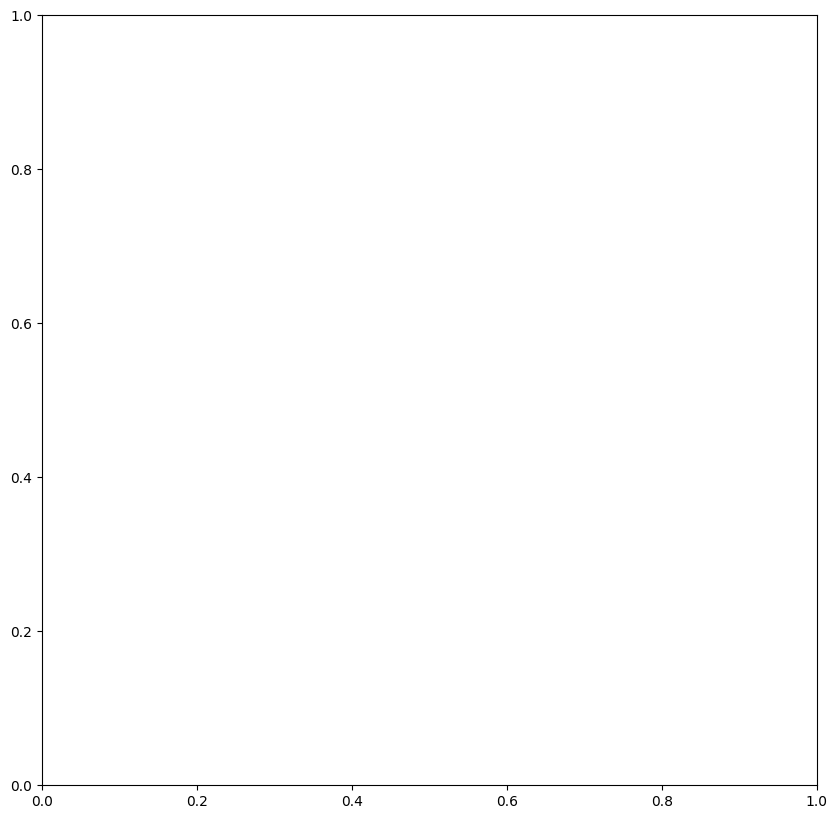

In [18]:
dataframe[numerical_features].corr()

dataframe[numerical_features].corr()["SalePrice"].sort_values(ascending=False)

correlations = dataframe[numerical_features].corr()

figure, axis = pyplot.subplots(figsize=(10, 10))

In [19]:
seaborn.heatmap(correlations,
                ax = axis)

<Axes: >

<Axes: xlabel='SaleCondition', ylabel='SalePrice'>

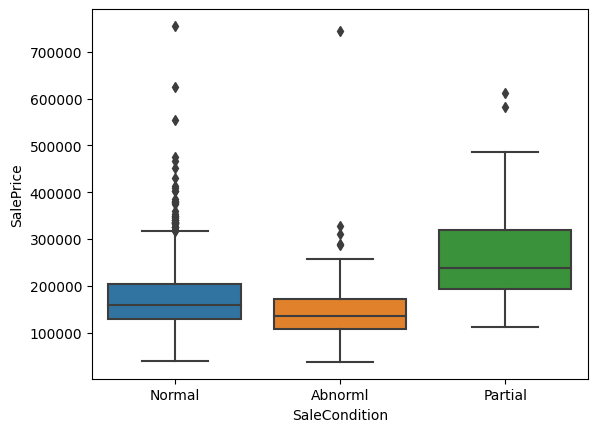

In [20]:
seaborn.boxplot(x = "SaleCondition",
                y = "SalePrice",
                data = dataframe)

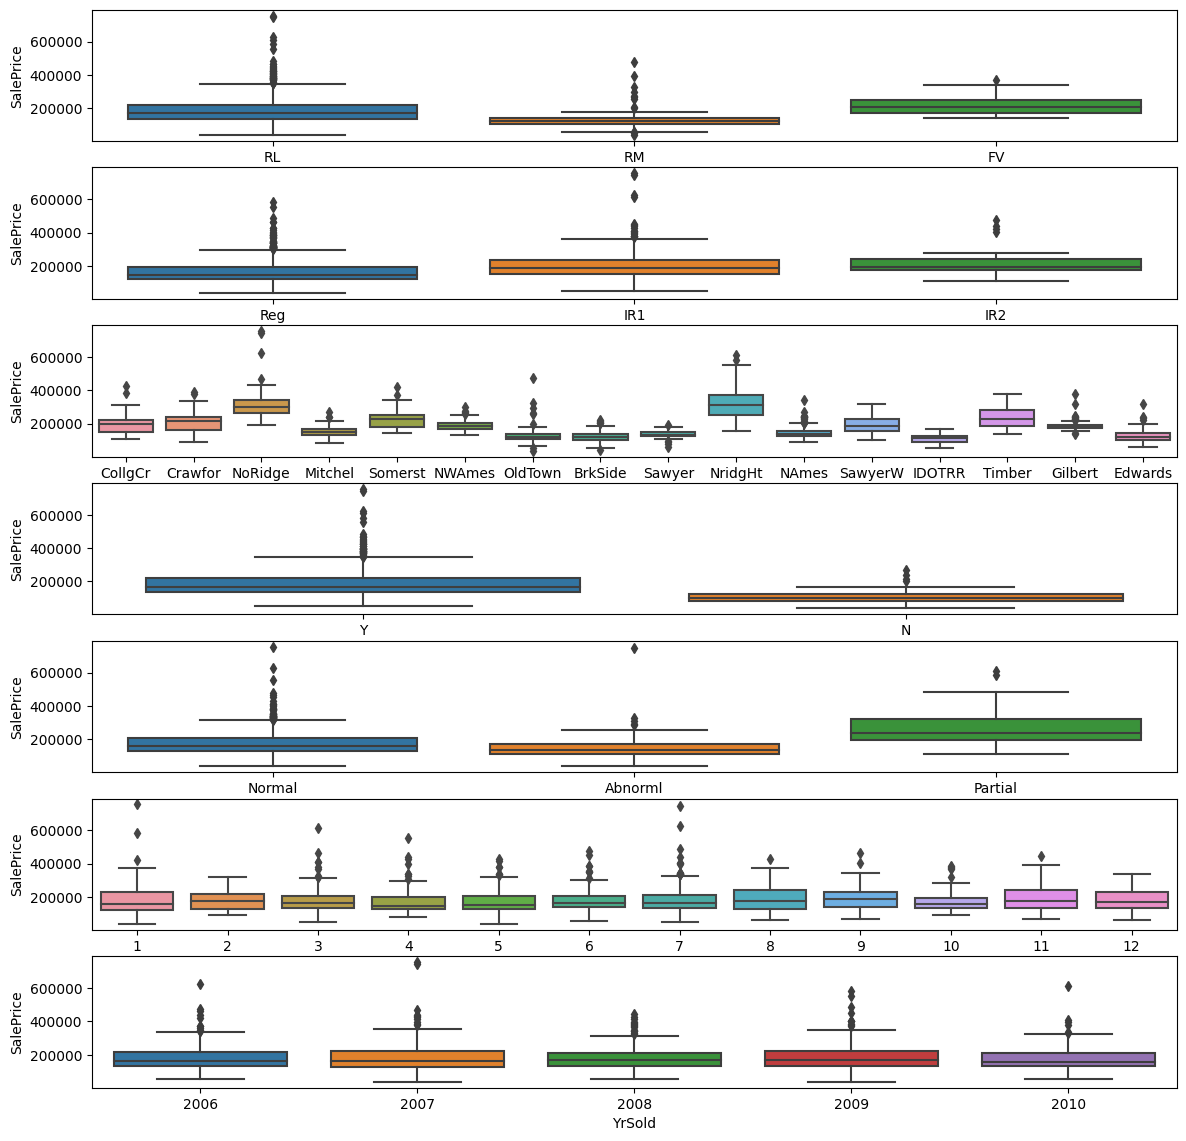

In [21]:
figure, axis = pyplot.subplots(7, 1,
                               figsize=(14, 14))

for feature, subplot in zip(categorical_features, 
                            axis.flatten()):
  
  seaborn.boxplot(x = feature,
                  y = "SalePrice",
                  data = dataframe,
                  ax = subplot)

<Axes: xlabel='MoSold', ylabel='SalePrice'>

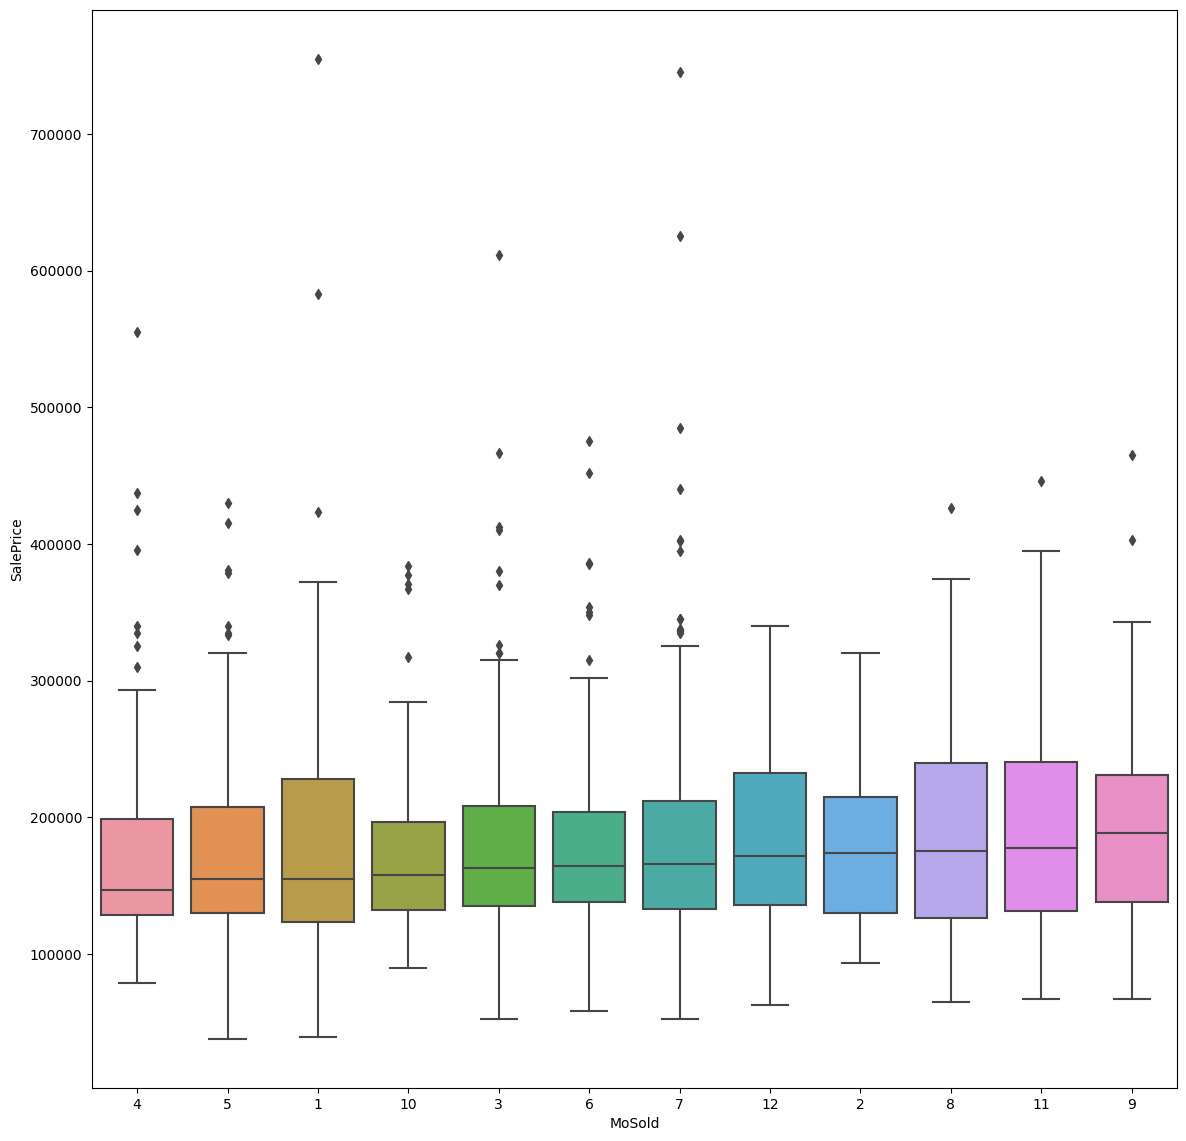

In [22]:
sorted_months_sold = dataframe.groupby("MoSold")["SalePrice"].median().sort_values().index.values

figure, axis = pyplot.subplots(figsize=(14, 14))

seaborn.boxplot(x = "MoSold",
                y = "SalePrice",
                data = dataframe,
                order = sorted_months_sold,
                ax = axis)

/home/blaise/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


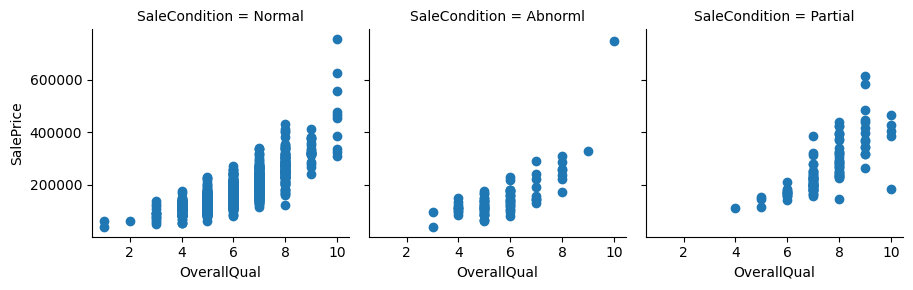

In [23]:
conditional_plot = seaborn.FacetGrid(dataframe,
                                    col = "SaleCondition",
                                    col_wrap = 4)

conditional_plot.map(pyplot.scatter,
                     "OverallQual",
                     "SalePrice")

/home/blaise/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


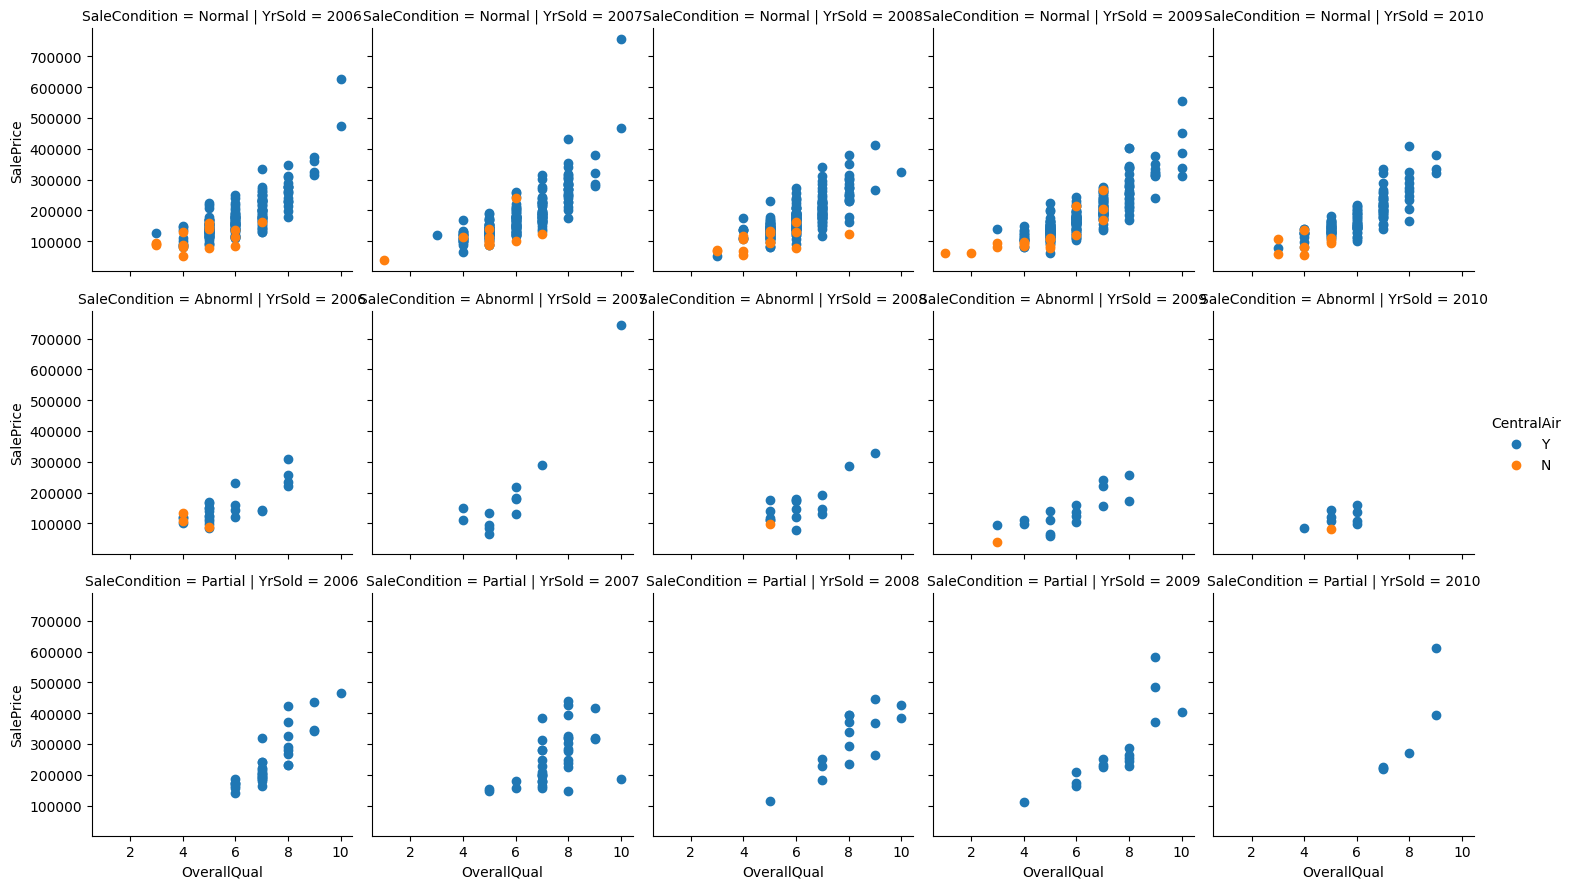

In [24]:
conditional_plot = seaborn.FacetGrid(dataframe,
                                     col = "YrSold",
                                     row = "SaleCondition",
                                     hue = "CentralAir")

conditional_plot.map(pyplot.scatter,
                     "OverallQual",
                     "SalePrice").add_legend()